# Import libraries

In [147]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg

plt.style.use('seaborn-darkgrid')

# Load the Dataset

In [148]:
df = pd.read_csv('COVIDdemographic.csv')
df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Total population_HISPANIC OR LATINO
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,4887871
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,737438
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,7171646
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,3013825
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,39557045


In [149]:
list(df.columns)

['State',
 'cases',
 'deaths',
 'Total Population',
 'Total population_Male',
 'Total population_Female',
 'Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 34 years',
 '35 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 74 years',
 '75 to 84 years',
 '85 years and over',
 'RACE_Total population',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Total population_HISPANIC OR LATINO']

In [150]:
df = df.rename(columns = {'Total population_HISPANIC OR LATINO':'Hispanic or Latino'})
df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,4887871
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,737438
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,7171646
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,3013825
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,39557045


In [151]:
list(df.columns)

['State',
 'cases',
 'deaths',
 'Total Population',
 'Total population_Male',
 'Total population_Female',
 'Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 34 years',
 '35 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 74 years',
 '75 to 84 years',
 '85 years and over',
 'RACE_Total population',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Hispanic or Latino']

In [152]:
df['Hispanic or Latino'] = (df['Total Population'])-(df['White'] + df['Black or African American'] + 
                                                     df['American Indian and Alaska Native'] + df['Asian'] + 
                                                     df['Native Hawaiian and Other Pacific Islander'])

df.head()

,State,cases,deaths,Total Population,Total population_Male,Total population_Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,65 to 74 years,75 to 84 years,85 years and over,RACE_Total population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino
0,Alabama,387786,14345,4887871,2369271,2518600,288589,290369,321430,332209,...,493396,251025,85242,4887871,3306838,1307040,22063,65095,1797,185038
1,Alaska,18316,367,737438,382952,354486,52173,52544,49747,48514,...,59630,21000,7370,737438,474555,25197,111371,46381,7958,71976
2,Arizona,426614,18857,7171646,3565129,3606517,434032,441613,488738,477306,...,727956,398408,132739,7171646,5590505,336340,330599,237873,15661,660668
3,Arkansas,161569,3301,3013825,1476680,1537145,188092,192523,203502,208021,...,296808,154699,56169,3013825,2306096,456714,20951,47548,9398,173118
4,California,2664110,102387,39557045,19673553,19883492,2428493,2398894,2646096,2557470,...,3286461,1651296,729580,39557045,23535388,2283850,302792,5821585,155739,7457691


In [153]:
df = df[['State', 'cases', 'deaths', 'Total Population', 'White', 'Black or African American', 
         'American Indian and Alaska Native', 'Asian', 'Native Hawaiian and Other Pacific Islander', 
         'Hispanic or Latino']]

df.head()

,State,cases,deaths,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino
0,Alabama,387786,14345,4887871,3306838,1307040,22063,65095,1797,185038
1,Alaska,18316,367,737438,474555,25197,111371,46381,7958,71976
2,Arizona,426614,18857,7171646,5590505,336340,330599,237873,15661,660668
3,Arkansas,161569,3301,3013825,2306096,456714,20951,47548,9398,173118
4,California,2664110,102387,39557045,23535388,2283850,302792,5821585,155739,7457691


In [154]:
df = df.drop(columns = ['cases', 'deaths'])
df.head()

,State,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino
0,Alabama,4887871,3306838,1307040,22063,65095,1797,185038
1,Alaska,737438,474555,25197,111371,46381,7958,71976
2,Arizona,7171646,5590505,336340,330599,237873,15661,660668
3,Arkansas,3013825,2306096,456714,20951,47548,9398,173118
4,California,39557045,23535388,2283850,302792,5821585,155739,7457691


In [155]:
COVID_Case = pd.read_csv('COVID.csv', index_col = 0)
COVID_Case.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [156]:
df = pd.merge(df, COVID_Case, how = 'left', on = 'State')
df.head()

,State,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino,cases,deaths
0,Alabama,4887871,3306838,1307040,22063,65095,1797,185038,26912,785
1,Alaska,737438,474555,25197,111371,46381,7958,71976,751,10
2,Arizona,7171646,5590505,336340,330599,237873,15661,660668,39298,1228
3,Arkansas,3013825,2306096,456714,20951,47548,9398,173118,13191,188
4,California,39557045,23535388,2283850,302792,5821585,155739,7457691,159098,5202


In [157]:
columns = ['White', 'Black or African American', 'American Indian and Alaska Native', 'Asian', 
           'Native Hawaiian and Other Pacific Islander', 'Hispanic or Latino']

for c in columns:
    df['{}_Prop'.format(c)] = (df['cases']/df['Total Population'])
    df['{}_Prop_100K'.format(c)] = (df['{}_Prop'.format(c)]/df[c]) * 100000
    
df.head()

,State,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic or Latino,cases,deaths,...,Black or African American_Prop,Black or African American_Prop_100K,American Indian and Alaska Native_Prop,American Indian and Alaska Native_Prop_100K,Asian_Prop,Asian_Prop_100K,Native Hawaiian and Other Pacific Islander_Prop,Native Hawaiian and Other Pacific Islander_Prop_100K,Hispanic or Latino_Prop,Hispanic or Latino_Prop_100K
0,Alabama,4887871,3306838,1307040,22063,65095,1797,185038,26912,785,...,0.005506,0.000421,0.005506,0.024955,0.005506,0.008458,0.005506,0.306393,0.005506,0.002976
1,Alaska,737438,474555,25197,111371,46381,7958,71976,751,10,...,0.001018,0.004042,0.001018,0.000914,0.001018,0.002196,0.001018,0.012797,0.001018,0.001415
2,Arizona,7171646,5590505,336340,330599,237873,15661,660668,39298,1228,...,0.005480,0.001629,0.005480,0.001657,0.005480,0.002304,0.005480,0.034989,0.005480,0.000829
3,Arkansas,3013825,2306096,456714,20951,47548,9398,173118,13191,188,...,0.004377,0.000958,0.004377,0.020891,0.004377,0.009205,0.004377,0.046572,0.004377,0.002528
4,California,39557045,23535388,2283850,302792,5821585,155739,7457691,159098,5202,...,0.004022,0.000176,0.004022,0.001328,0.004022,0.000069,0.004022,0.002583,0.004022,0.000054


In [158]:
columns_keep = ['State', 'Total Population', 'cases', 'deaths']

df_columns = list(df.columns)

for c in df_columns:
    if '_Prop_100K' in c:
        columns_keep.append(c)
    
df = df[columns_keep]
df.head()

,State,Total Population,cases,deaths,White_Prop_100K,Black or African American_Prop_100K,American Indian and Alaska Native_Prop_100K,Asian_Prop_100K,Native Hawaiian and Other Pacific Islander_Prop_100K,Hispanic or Latino_Prop_100K
0,Alabama,4887871,26912,785,0.000166,0.000421,0.024955,0.008458,0.306393,0.002976
1,Alaska,737438,751,10,0.000215,0.004042,0.000914,0.002196,0.012797,0.001415
2,Arizona,7171646,39298,1228,0.000098,0.001629,0.001657,0.002304,0.034989,0.000829
3,Arkansas,3013825,13191,188,0.000190,0.000958,0.020891,0.009205,0.046572,0.002528
4,California,39557045,159098,5202,0.000017,0.000176,0.001328,0.000069,0.002583,0.000054


In [159]:
df.shape

(51, 10)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   State                                                 51 non-null     object 
 1   Total Population                                      51 non-null     int64  
 2   cases                                                 51 non-null     int64  
 3   deaths                                                51 non-null     int64  
 4   White_Prop_100K                                       51 non-null     float64
 5   Black or African American_Prop_100K                   51 non-null     float64
 6   American Indian and Alaska Native_Prop_100K           51 non-null     float64
 7   Asian_Prop_100K                                       51 non-null     float64
 8   Native Hawaiian and Other Pacific Islander_Prop_100K  51 non-n

In [161]:
df.isnull().sum()

State                                                   0
Total Population                                        0
cases                                                   0
deaths                                                  0
White_Prop_100K                                         0
Black or African American_Prop_100K                     0
American Indian and Alaska Native_Prop_100K             0
Asian_Prop_100K                                         0
Native Hawaiian and Other Pacific Islander_Prop_100K    0
Hispanic or Latino_Prop_100K                            0
dtype: int64

In [162]:
df.describe()

,Total Population,cases,deaths,White_Prop_100K,Black or African American_Prop_100K,American Indian and Alaska Native_Prop_100K,Asian_Prop_100K,Native Hawaiian and Other Pacific Islander_Prop_100K,Hispanic or Latino_Prop_100K
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6.415048e+06,41994.235294,2290.549020,0.000341,0.005705,0.052640,0.009164,0.622875,0.004441
std,7.343308e+06,63513.183767,4748.588326,0.000712,0.009840,0.114376,0.012241,1.904126,0.006200
min,5.777370e+05,614.000000,10.000000,0.000016,0.000095,0.000714,0.000069,0.000354,0.000054
25%,1.780020e+06,9231.500000,212.000000,0.000079,0.000529,0.008637,0.001506,0.045013,0.000958
50%,4.468402e+06,20152.000000,704.000000,0.000148,0.001498,0.015833,0.003924,0.142613,0.001821
75%,7.353618e+06,46961.500000,2469.500000,0.000311,0.005810,0.046022,0.010301,0.472382,0.005015
max,3.955704e+07,389349.000000,30683.000000,0.004710,0.051403,0.723431,0.050754,13.259550,0.024930


## Pearson Correlation

In [163]:
Pcorr = df.corr(method = 'pearson')
Pcorr

,Total Population,cases,deaths,White_Prop_100K,Black or African American_Prop_100K,American Indian and Alaska Native_Prop_100K,Asian_Prop_100K,Native Hawaiian and Other Pacific Islander_Prop_100K,Hispanic or Latino_Prop_100K
Total Population,1.000000,0.661893,0.452008,-0.260193,-0.377231,-0.218672,-0.434568,-0.196001,-0.403638
cases,0.661893,1.000000,0.957358,-0.135845,-0.286095,-0.078190,-0.306122,-0.111349,-0.264064
deaths,0.452008,0.957358,1.000000,-0.088915,-0.217083,-0.031648,-0.234918,-0.074738,-0.195992
White_Prop_100K,-0.260193,-0.135845,-0.088915,1.000000,0.186559,0.954081,0.762577,0.394968,0.777440
Black or African American_Prop_100K,-0.377231,-0.286095,-0.217083,0.186559,1.000000,0.087876,0.642011,0.477453,0.524476
American Indian and Alaska Native_Prop_100K,-0.218672,-0.078190,-0.031648,0.954081,0.087876,1.000000,0.644437,0.238925,0.683517
Asian_Prop_100K,-0.434568,-0.306122,-0.234918,0.762577,0.642011,0.644437,1.000000,0.630964,0.923590
Native Hawaiian and Other Pacific Islander_Prop_100K,-0.196001,-0.111349,-0.074738,0.394968,0.477453,0.238925,0.630964,1.000000,0.657394
Hispanic or Latino_Prop_100K,-0.403638,-0.264064,-0.195992,0.777440,0.524476,0.683517,0.923590,0.657394,1.000000


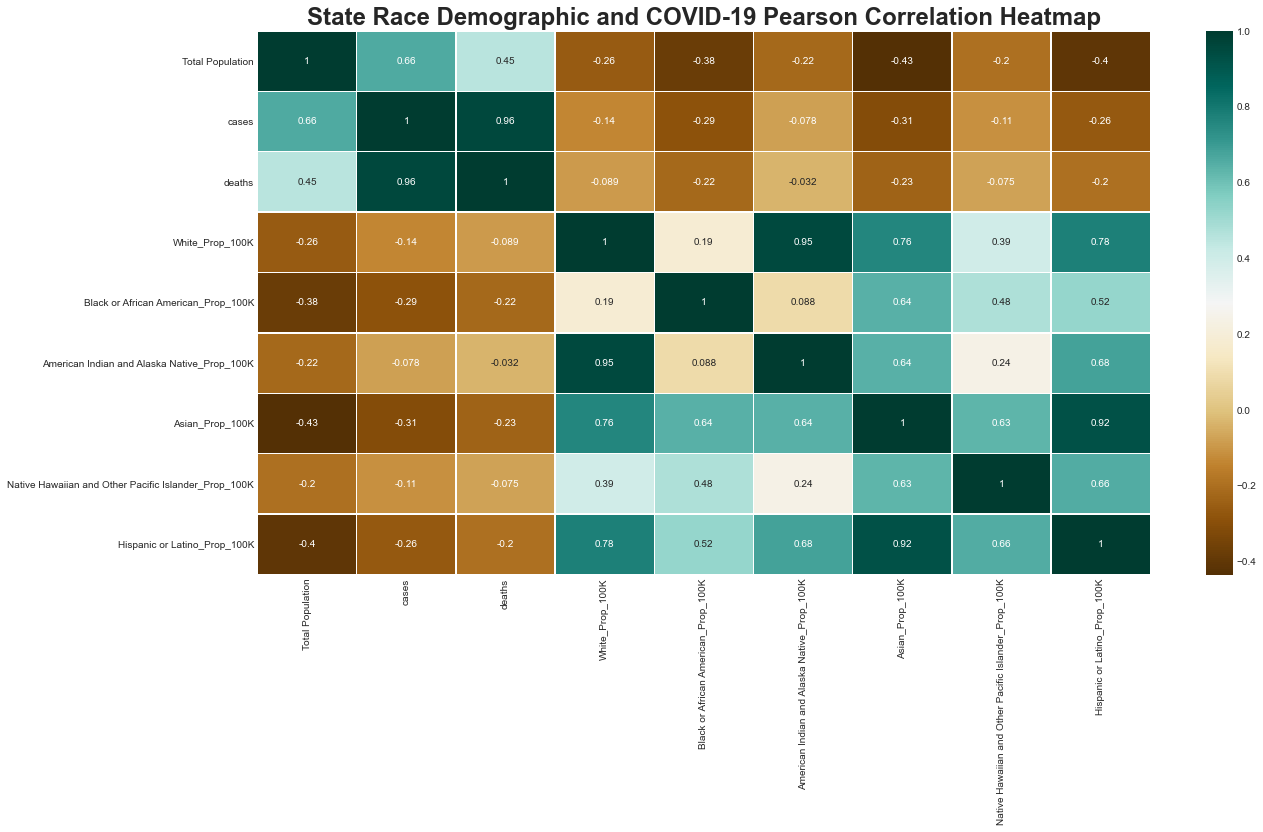

In [164]:
plt.figure(figsize = (20,10))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Kendall Correlation

In [165]:
Kcorr = df.corr(method = 'kendall')
Kcorr

,Total Population,cases,deaths,White_Prop_100K,Black or African American_Prop_100K,American Indian and Alaska Native_Prop_100K,Asian_Prop_100K,Native Hawaiian and Other Pacific Islander_Prop_100K,Hispanic or Latino_Prop_100K
Total Population,1.000000,0.716078,0.646528,-0.479216,-0.639216,-0.140392,-0.634510,-0.294118,-0.520000
cases,0.716078,1.000000,0.823853,-0.201569,-0.487059,0.061961,-0.388235,-0.047843,-0.258039
deaths,0.646528,0.823853,1.000000,-0.158494,-0.440957,0.125539,-0.342095,0.023539,-0.211848
White_Prop_100K,-0.479216,-0.201569,-0.158494,1.000000,0.472941,0.416471,0.581176,0.557647,0.651765
Black or African American_Prop_100K,-0.639216,-0.487059,-0.440957,0.472941,1.000000,0.149804,0.499608,0.344314,0.450980
American Indian and Alaska Native_Prop_100K,-0.140392,0.061961,0.125539,0.416471,0.149804,1.000000,0.323922,0.529412,0.491765
Asian_Prop_100K,-0.634510,-0.388235,-0.342095,0.581176,0.499608,0.323922,1.000000,0.552941,0.763137
Native Hawaiian and Other Pacific Islander_Prop_100K,-0.294118,-0.047843,0.023539,0.557647,0.344314,0.529412,0.552941,1.000000,0.686275
Hispanic or Latino_Prop_100K,-0.520000,-0.258039,-0.211848,0.651765,0.450980,0.491765,0.763137,0.686275,1.000000


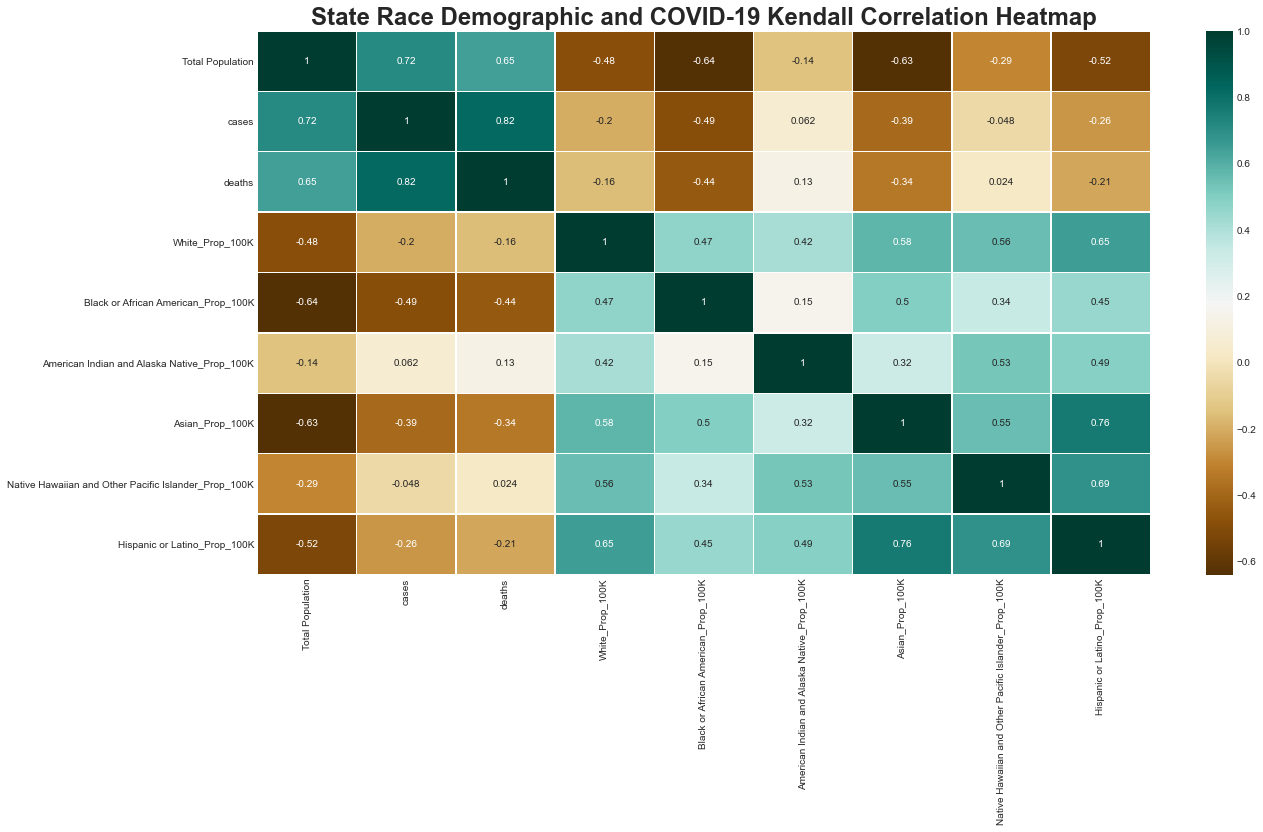

In [166]:
plt.figure(figsize = (20,10))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Kendall Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Spearman Correlation

In [167]:
Scorr = df.corr(method = 'spearman')
Scorr

,Total Population,cases,deaths,White_Prop_100K,Black or African American_Prop_100K,American Indian and Alaska Native_Prop_100K,Asian_Prop_100K,Native Hawaiian and Other Pacific Islander_Prop_100K,Hispanic or Latino_Prop_100K
Total Population,1.000000,0.896018,0.837621,-0.650136,-0.833032,-0.194027,-0.779548,-0.402443,-0.682534
cases,0.896018,1.000000,0.953189,-0.277466,-0.689050,0.107511,-0.534027,-0.064706,-0.365520
deaths,0.837621,0.953189,1.000000,-0.239508,-0.632910,0.182176,-0.480599,0.026109,-0.311138
White_Prop_100K,-0.650136,-0.277466,-0.239508,1.000000,0.640000,0.577738,0.747240,0.725430,0.824253
Black or African American_Prop_100K,-0.833032,-0.689050,-0.632910,0.640000,1.000000,0.186697,0.683529,0.452036,0.627783
American Indian and Alaska Native_Prop_100K,-0.194027,0.107511,0.182176,0.577738,0.186697,1.000000,0.456109,0.694389,0.654389
Asian_Prop_100K,-0.779548,-0.534027,-0.480599,0.747240,0.683529,0.456109,1.000000,0.725973,0.924615
Native Hawaiian and Other Pacific Islander_Prop_100K,-0.402443,-0.064706,0.026109,0.725430,0.452036,0.694389,0.725973,1.000000,0.863801
Hispanic or Latino_Prop_100K,-0.682534,-0.365520,-0.311138,0.824253,0.627783,0.654389,0.924615,0.863801,1.000000


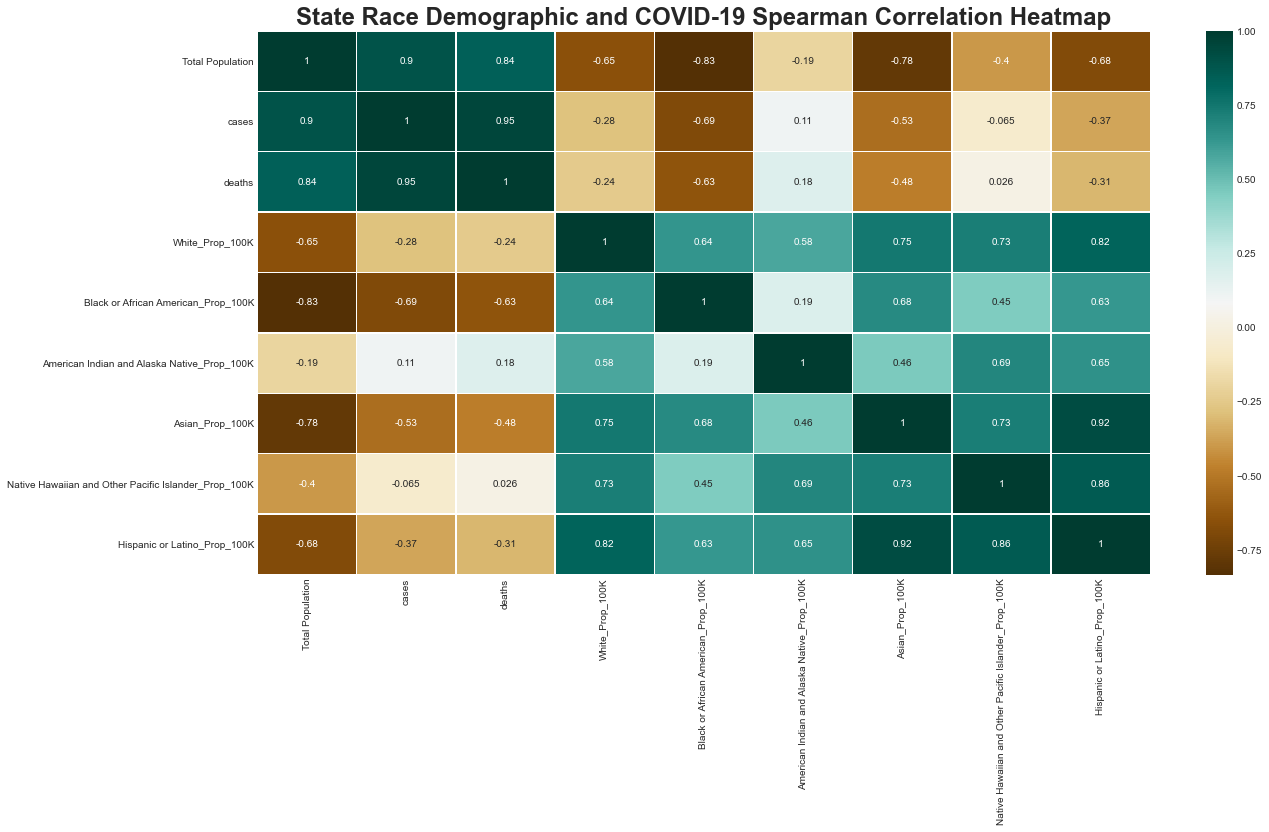

In [168]:
plt.figure(figsize = (20,10))
sns.heatmap(Scorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 24);

In [169]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['Ethnicity'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases)
AllCorr['Kendall Correlation'] = list(Kcorr.cases)
AllCorr['Spearman Correlation'] = list(Scorr.cases)

AllCorr = AllCorr.drop(list(range(0, 3)))
AllCorr = AllCorr.reset_index(drop = True)

AllCorr

,Ethnicity,Pearson Correlation,Kendall Correlation,Spearman Correlation
0,White_Prop_100K,-0.135845,-0.201569,-0.277466
1,Black or African American_Prop_100K,-0.286095,-0.487059,-0.689050
2,American Indian and Alaska Native_Prop_100K,-0.078190,0.061961,0.107511
3,Asian_Prop_100K,-0.306122,-0.388235,-0.534027
4,Native Hawaiian and Other Pacific Islander_Pro...,-0.111349,-0.047843,-0.064706
5,Hispanic or Latino_Prop_100K,-0.264064,-0.258039,-0.365520


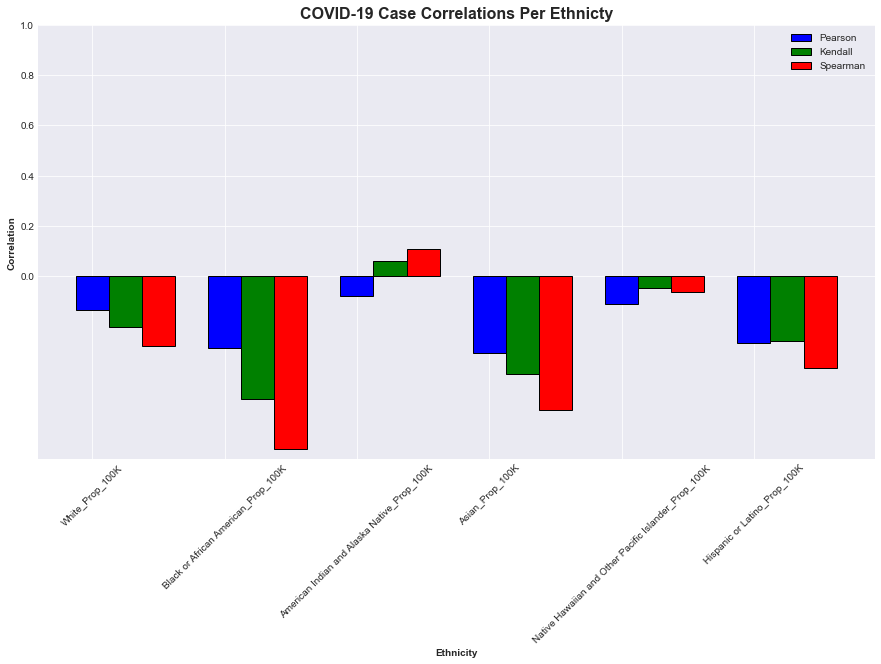

In [170]:
fig = plt.figure(figsize = (15,8))

X = list(AllCorr['Ethnicity'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Ethnicty', fontsize = 16, fontweight = 'bold')

plt.xlabel('Ethnicity', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

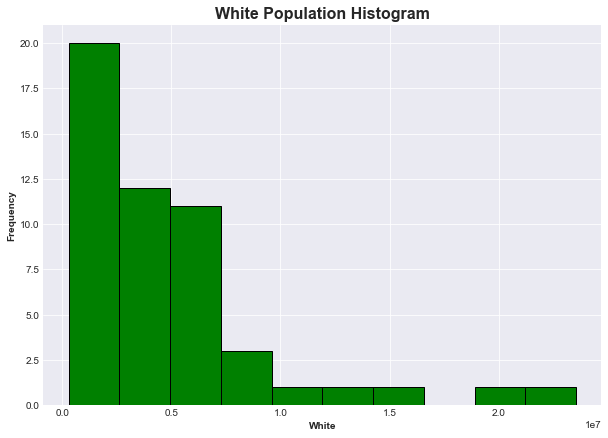

In [18]:
plt.style.use('seaborn-darkgrid')

df['White'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('White Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('White', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

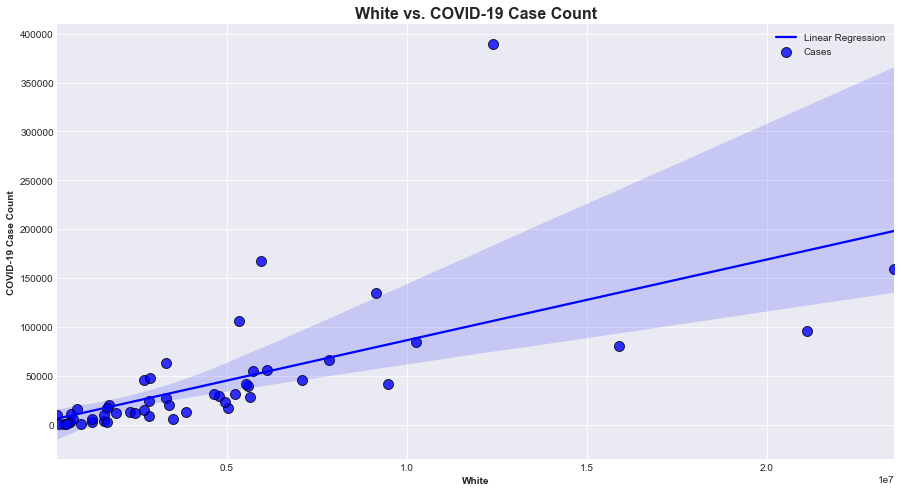

In [24]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'White', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('White vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('White', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [25]:
spearmanr(df['cases'], df['White'])

SpearmanrResult(correlation=0.8761990950226244, pvalue=3.7718107928809123e-17)

In [26]:
model1 = sm.OLS(df['cases'], df['White']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.585
Model:                            OLS   Adj. R-squared (uncentered):              0.577
Method:                 Least Squares   F-statistic:                              70.53
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    4.05e-11
Time:                        00:06:06   Log-Likelihood:                         -622.84
No. Observations:                  51   AIC:                                      1248.
Df Residuals:                      50   BIC:                                      1250.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
White          0.0087      0.001      8.398      0.000       0.007       0.011
==============================================================================
Omnibus:                       74.932   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              939.586
Skew:                           3.868   Prob(JB):                    9.36e-205
Kurtosis:                      22.553   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

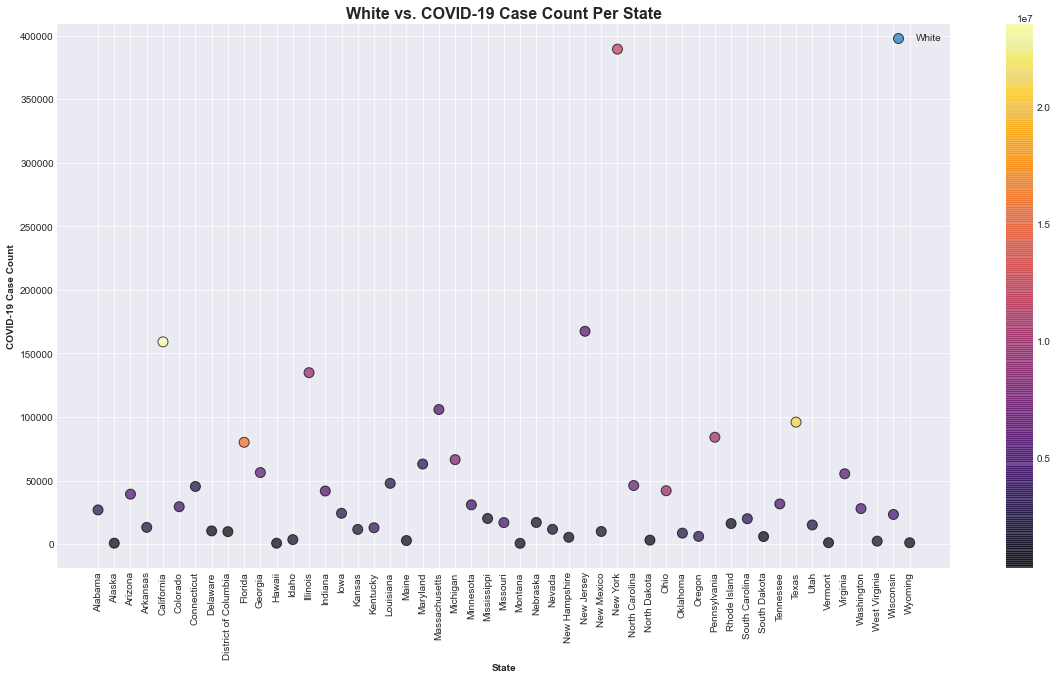

In [27]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['White'], cmap = 'inferno')
plt.title('White vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['White'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

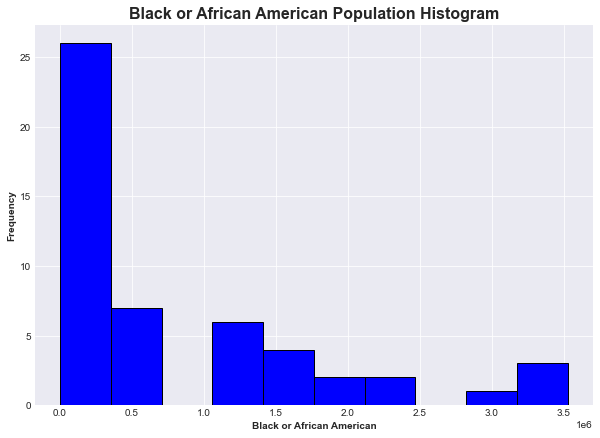

In [19]:
plt.style.use('seaborn-darkgrid')

df['Black or African American'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Black or African American Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Black or African American', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

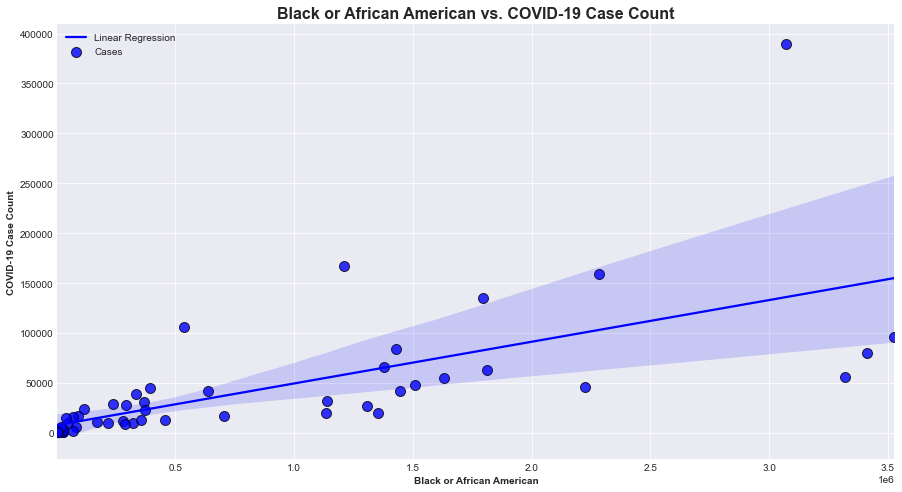

In [28]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Black or African American', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Black or African American vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Black or African American', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [29]:
spearmanr(df['cases'], df['Black or African American'])

SpearmanrResult(correlation=0.8893212669683257, pvalue=2.834054967270533e-18)

In [30]:
model2 = sm.OLS(df['cases'], df['Black or African American']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.591
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              72.26
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    2.83e-11
Time:                        00:06:07   Log-Likelihood:                         -622.47
No. Observations:                  51   AIC:                                      1247.
Df Residuals:                      50   BIC:                                      1249.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Black or African American     0.0458      0.005      8.501      0.000       0.035       0.057
==============================================================================
Omnibus:                       51.424   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           2.485   Prob(JB):                     1.27e-71
Kurtosis:                      14.355   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

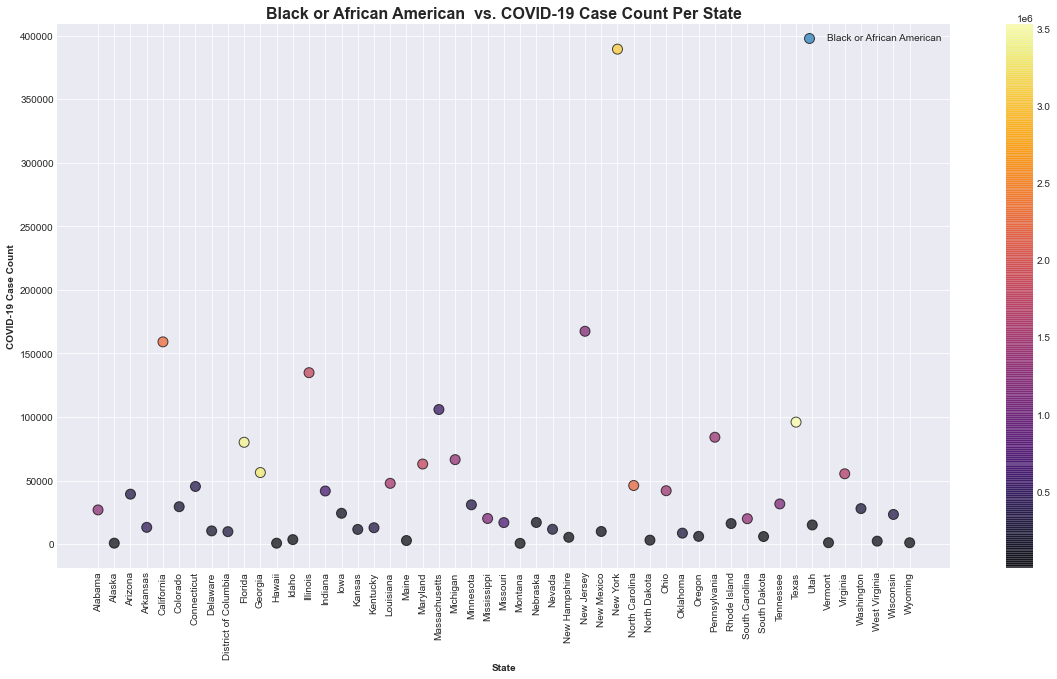

In [31]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Black or African American'], cmap = 'inferno')
plt.title('Black or African American  vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Black or African American'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

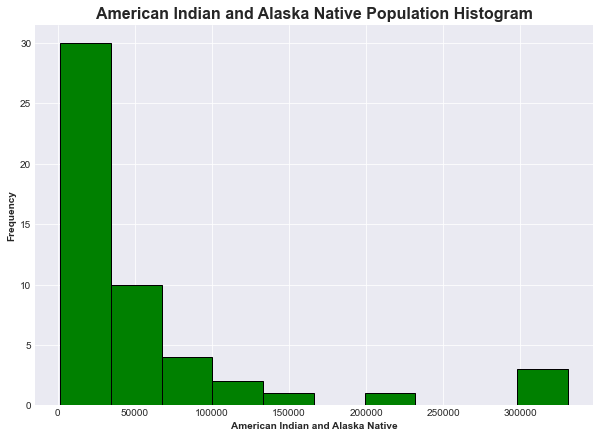

In [20]:
plt.style.use('seaborn-darkgrid')

df['American Indian and Alaska Native'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('American Indian and Alaska Native Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('American Indian and Alaska Native', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

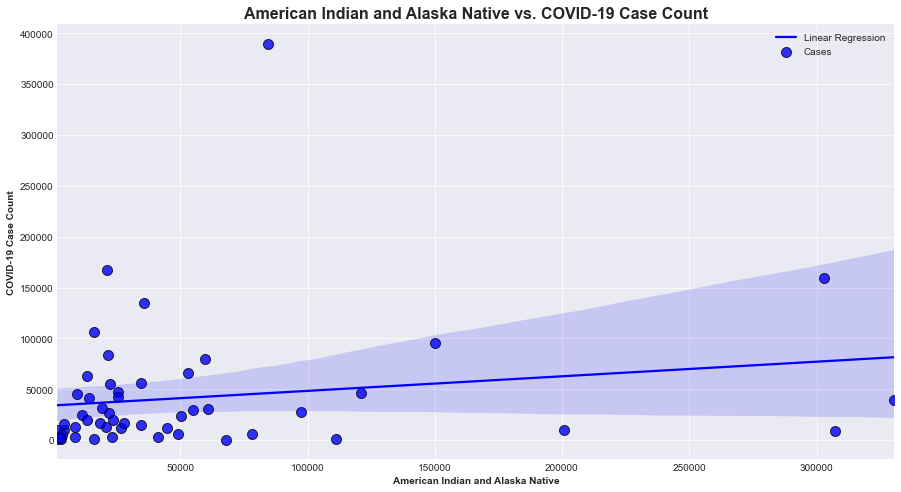

In [32]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'American Indian and Alaska Native', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('American Indian and Alaska Native vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('American Indian and Alaska Native', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [33]:
spearmanr(df['cases'], df['American Indian and Alaska Native'])

SpearmanrResult(correlation=0.25348416289592757, pvalue=0.07268544758614355)

In [34]:
model3 = sm.OLS(df['cases'], df['American Indian and Alaska Native']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.180
Method:                 Least Squares   F-statistic:                              12.17
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                     0.00102
Time:                        00:06:09   Log-Likelihood:                         -639.72
No. Observations:                  51   AIC:                                      1281.
Df Residuals:                      50   BIC:                                      1283.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
American Indian and Alaska Native     0.3576      0.103      3.488      0.001       0.152       0.564
==============================================================================
Omnibus:                       58.121   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.654
Skew:                           2.870   Prob(JB):                     4.13e-95
Kurtosis:                      16.099   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

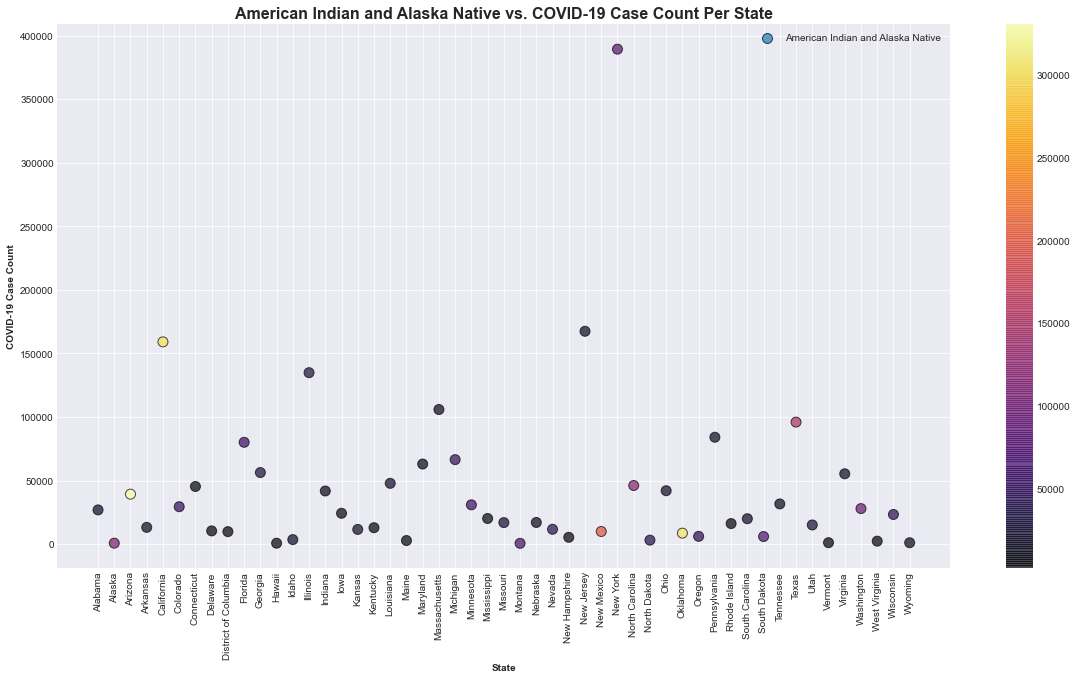

In [35]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['American Indian and Alaska Native'], cmap = 'inferno')
plt.title('American Indian and Alaska Native vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['American Indian and Alaska Native'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

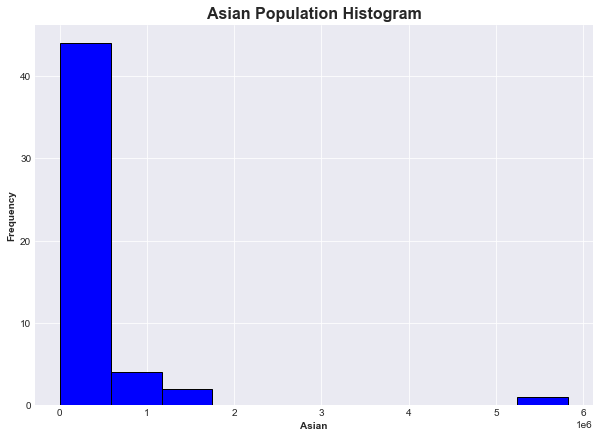

In [21]:
plt.style.use('seaborn-darkgrid')

df['Asian'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Asian Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Asian', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

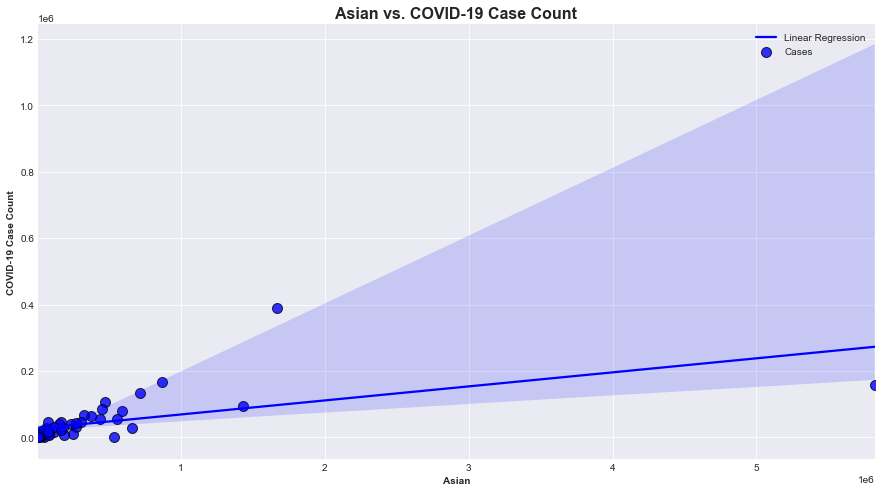

In [36]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Asian', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Asian vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Asian', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [37]:
spearmanr(df['cases'], df['Asian'])

SpearmanrResult(correlation=0.8042533936651584, pvalue=1.176239236337126e-12)

In [38]:
model4 = sm.OLS(df['cases'], df['Asian']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.425
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              36.89
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    1.68e-07
Time:                        00:06:10   Log-Likelihood:                         -631.18
No. Observations:                  51   AIC:                                      1264.
Df Residuals:                      50   BIC:                                      1266.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Asian          0.0538      0.009      6.074      0.000       0.036       0.072
==============================================================================
Omnibus:                       52.447   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.401
Skew:                           2.292   Prob(JB):                    1.47e-111
Kurtosis:                      17.805   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

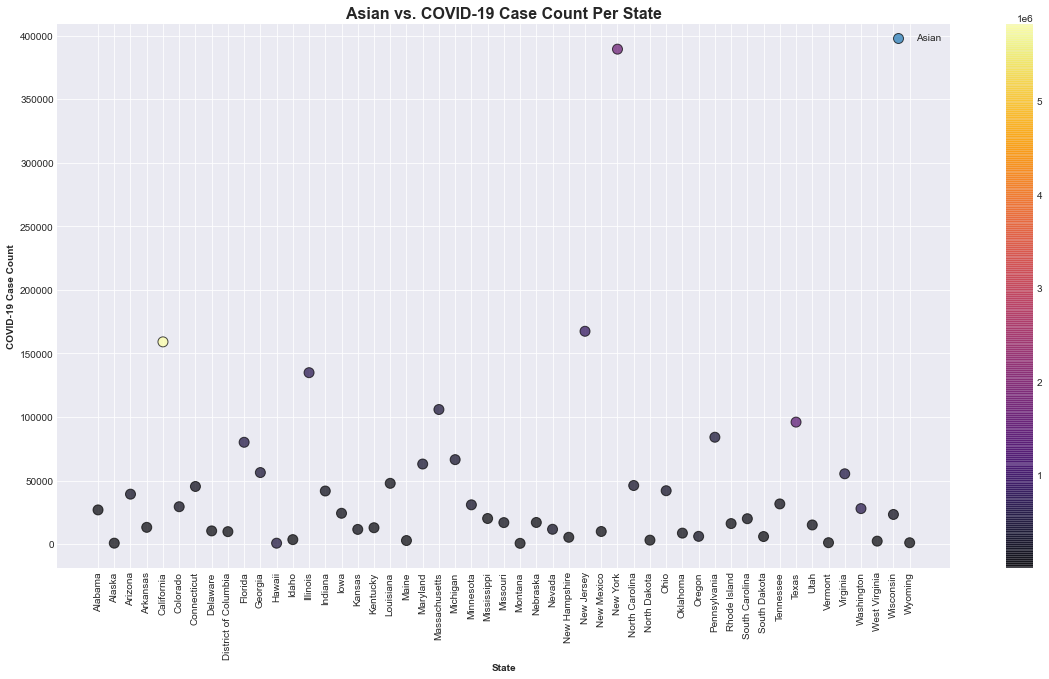

In [39]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Asian'], cmap = 'inferno')
plt.title('Asian vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Asian'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

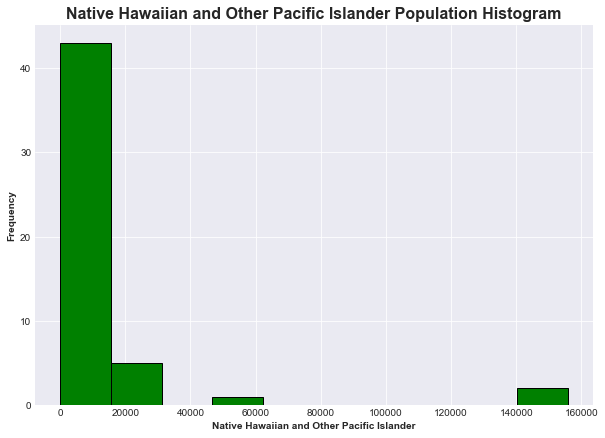

In [22]:
plt.style.use('seaborn-darkgrid')

df['Native Hawaiian and Other Pacific Islander'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Native Hawaiian and Other Pacific Islander Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Native Hawaiian and Other Pacific Islander', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

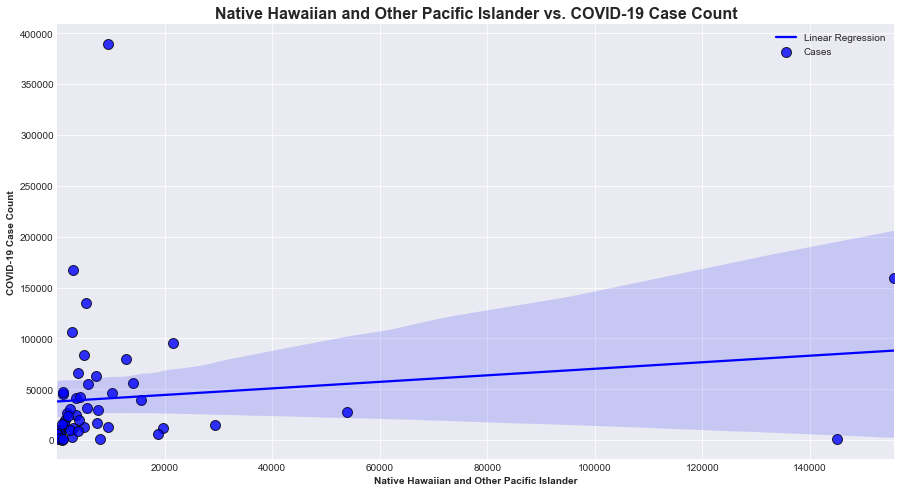

In [40]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Native Hawaiian and Other Pacific Islander', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Native Hawaiian and Other Pacific Islander vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Native Hawaiian and Other Pacific Islander', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [41]:
spearmanr(df['cases'], df['Native Hawaiian and Other Pacific Islander'])

SpearmanrResult(correlation=0.4179185520361991, pvalue=0.0022767748893992713)

In [42]:
model5 = sm.OLS(df['cases'], df['Native Hawaiian and Other Pacific Islander']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.091
Method:                 Least Squares   F-statistic:                              6.084
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                      0.0171
Time:                        00:06:11   Log-Likelihood:                         -642.34
No. Observations:                  51   AIC:                                      1287.
Df Residuals:                      50   BIC:                                      1289.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Native Hawaiian and Other Pacific Islander     0.7827      0.317      2.467      0.017       0.145       1.420
==============================================================================
Omnibus:                       65.475   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.466
Skew:                           3.267   Prob(JB):                    7.57e-138
Kurtosis:                      18.952   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

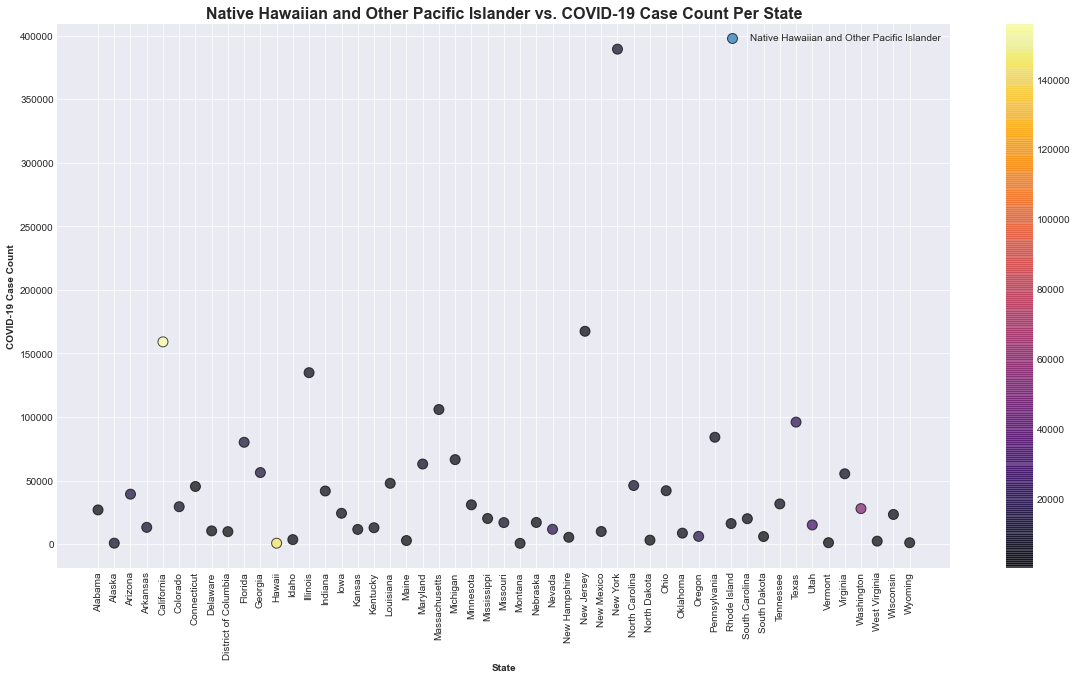

In [43]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Native Hawaiian and Other Pacific Islander'], cmap = 'inferno')
plt.title('Native Hawaiian and Other Pacific Islander vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Native Hawaiian and Other Pacific Islander'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

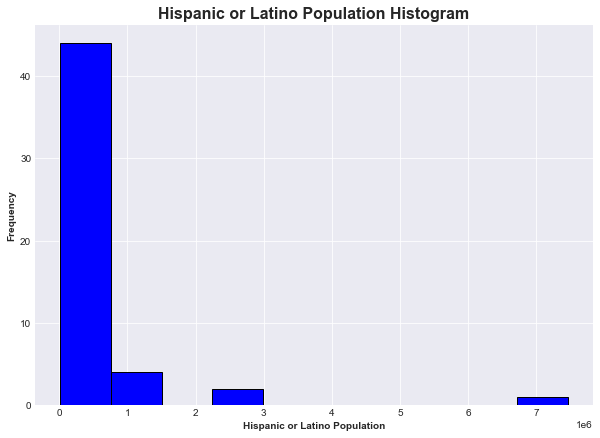

In [23]:
plt.style.use('seaborn-darkgrid')

df['Hispanic or Latino'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Hispanic or Latino Population Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hispanic or Latino Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

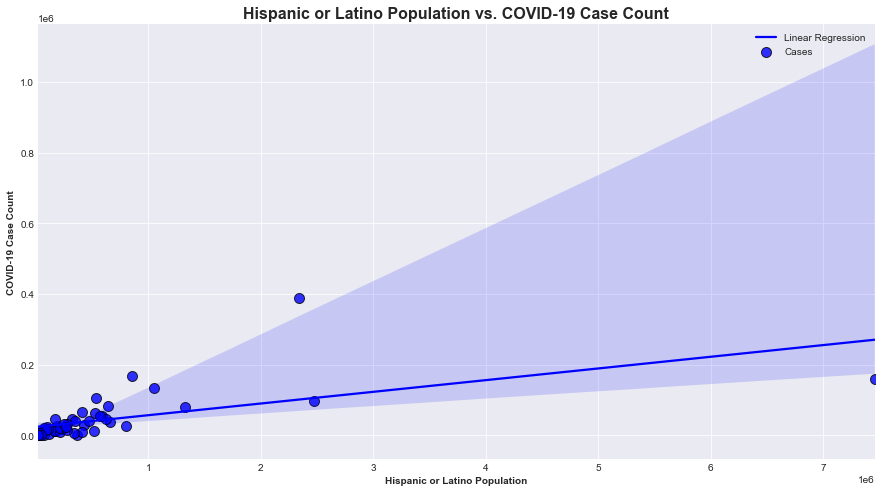

In [44]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Hispanic or Latino', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Hispanic or Latino Population vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hispanic or Latino Population', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [45]:
spearmanr(df['cases'], df['Hispanic or Latino'])

SpearmanrResult(correlation=0.8071493212669683, pvalue=8.462501618742135e-13)

In [46]:
model6 = sm.OLS(df['cases'], df['Hispanic or Latino']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.444
Method:                 Least Squares   F-statistic:                              41.78
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    4.15e-08
Time:                        00:06:12   Log-Likelihood:                         -629.79
No. Observations:                  51   AIC:                                      1262.
Df Residuals:                      50   BIC:                                      1264.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Hispanic or Latino     0.0418      0.006      6.464      0.000       0.029       0.055
==============================================================================
Omnibus:                       52.363   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.171
Skew:                           2.328   Prob(JB):                    6.58e-104
Kurtosis:                      17.211   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

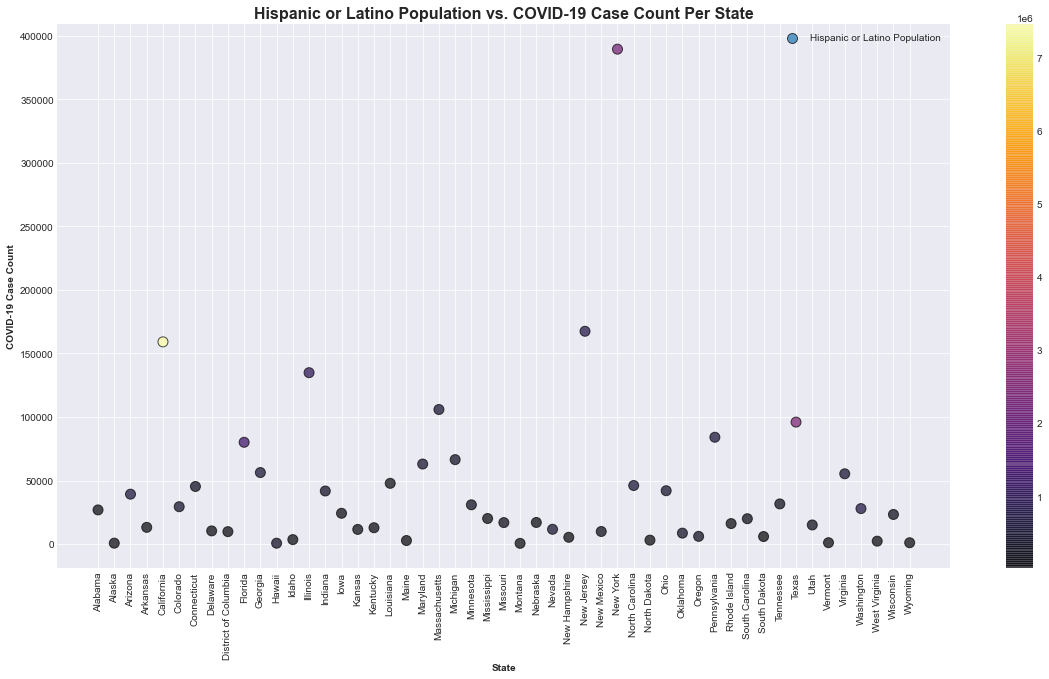

In [47]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Hispanic or Latino'], cmap = 'inferno')
plt.title('Hispanic or Latino Population vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Hispanic or Latino Population'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [48]:
model7 = sm.OLS(df['cases'], df[['White','Black or African American','American Indian and Alaska Native','Asian',
                 'Native Hawaiian and Other Pacific Islander','Hispanic or Latino']]).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              17.89
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                    1.79e-10
Time:                        00:11:37   Log-Likelihood:                         -614.18
No. Observations:                  51   AIC:                                      1240.
Df Residuals:                      45   BIC:                                      1252.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
White                                          0.0038      0.003      1.173      0.247      -0.003       0.010
Black or African American                      0.0299      0.011      2.689      0.010       0.008       0.052
American Indian and Alaska Native              0.0824      0.104      0.796      0.430      -0.126       0.291
Asian                                          0.1840      0.074      2.475      0.017       0.034       0.334
Native Hawaiian and Other Pacific Islander    -0.7521      0.313     -2.403      0.020      -1.383      -0.122
Hispanic or Latino                            -0.1225      0.062     -1.967      0.055      -0.248       0.003
==============================================================================
Omnibus:                       63.865   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.641
Skew:                           3.133   Prob(JB):                    1.70e-135
Kurtosis:                      18.900   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""